In [12]:
from os import listdir
from os.path import isfile, join
import licel as licel
import generic as generic
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [13]:
root_dir = '190221'
data_dir = root_dir+'/tc'
dark_dir = root_dir+'/dark'
filelist = [ join(data_dir,f) for f in listdir(data_dir) if isfile(join(data_dir,f)) ]
measurement = generic.LicelLidarMeasurement(filelist)
ch_list = measurement.channels.keys()
print(ch_list)

['00355.o_an', '00387.o_an', '00355.o_ph', '00387.o_ph']


In [41]:
ch_name = ch_list[2]

z = measurement.channels[ch_name].z

for key in sorted(measurement.channels[ch_name].site):
    sector = measurement.channels[ch_name].site[key].lower()
    data = measurement.channels[ch_name].data[key]
    if sector[0:2] == 'n':
        N = data
    if sector.lower()[0] == 'e':
        E = data
    if sector[0] == 'w':
        W = data
    if sector[0] == 's':
        S = data
    if sector[0:2] == 'n1':
        N2 = data
    if sector[0:4] == 'dark':
        D = data

        
background = np.mean(D[2670:4000])
Drc = (D - background) * (z **2)
#Nd = N - D
background = np.mean(Nd[2670:4000])
Nrc = (Nd - background) * (z **2)
#Ed = E - D
background = np.mean(Ed[2670:4000])
Erc = (Ed - background) * (z **2)
#Wd = W - D
background = np.mean(Wd[2670:4000])
Wrc = (Wd - background) * (z **2)
#Sd = S - D
background = np.mean(Sd[2670:4000])
Src = (Sd - background) * (z **2)
#N2d = N2 - D
background = np.mean(N2d[2670:4000])
N2rc = (N2d - background) * (z **2)

Nrc = Nrc - Drc
Erc = Erc - Drc
Wrc = Wrc - Drc
Src = Src - Drc
N2rc = N2rc - Drc

    
M = ( N + E + S + W ) / 4.0
Mrc = ( Nrc + Erc + Src + Wrc ) / 4.0

<IPython.core.display.Javascript object>


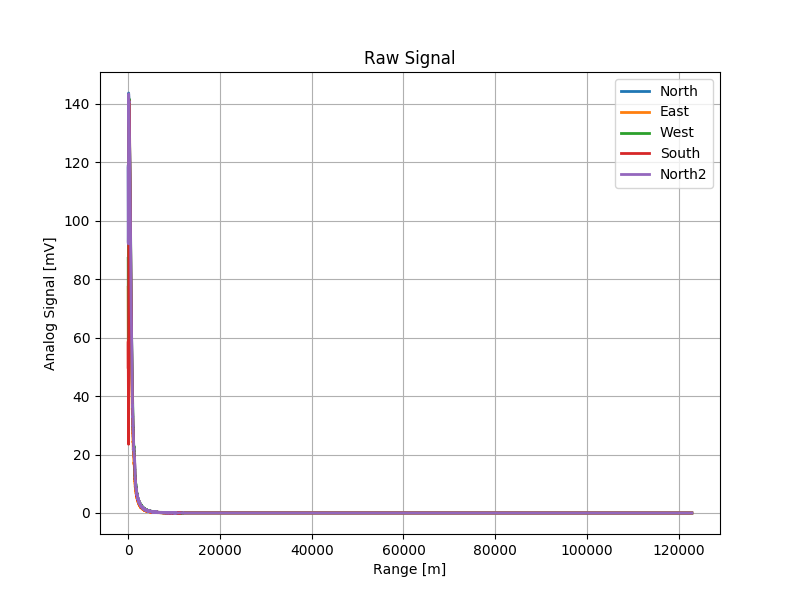

In [43]:
plt.figure(figsize=(8,6))
plt.plot(z,N, linewidth=2, label = 'North')
plt.plot(z,E, linewidth=2, label = 'East')
plt.plot(z,W, linewidth=2, label = 'West')
plt.plot(z,S, linewidth=2, label = 'South')
#plt.plot(z,M, linewidth=2, label = 'Mean')
plt.plot(z,N2, linewidth=2, label = 'North2')
plt.grid()
plt.legend(loc='upper right')
plt.title('Raw Signal')
plt.xlabel('Range [m]')
plt.ylabel('Analog Signal [mV]')
plt.show()

<IPython.core.display.Javascript object>


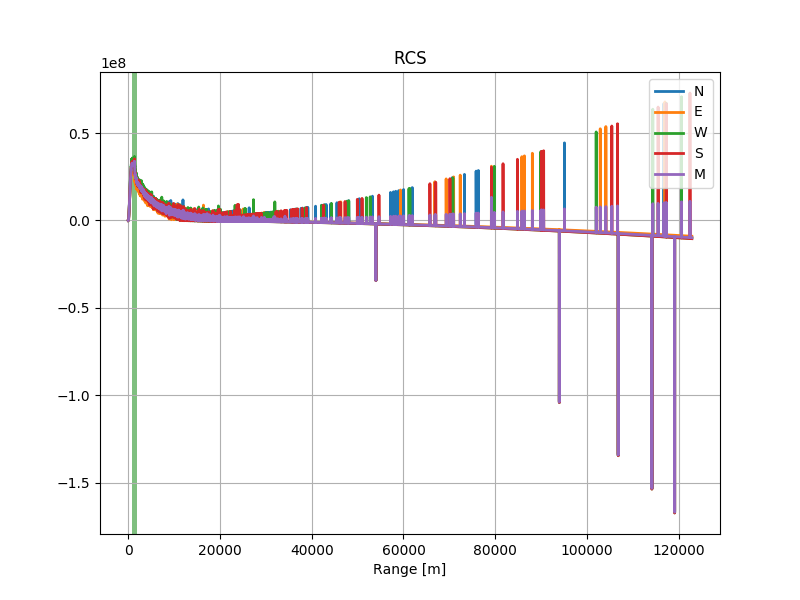

120 250 900.0 1875.0


In [44]:
r1 = 120
r2 = 250
plt.figure(figsize=(8,6))
plt.plot(z,Nrc, linewidth=2, label = 'N')
plt.plot(z,Erc, linewidth=2, label = 'E')
plt.plot(z,Wrc, linewidth=2, label = 'W')
plt.plot(z,Src, linewidth=2, label = 'S')
plt.plot(z,Mrc, linewidth=2, label = 'M')
print r1, r2, r1*7.5, r2*7.5
plt.axvspan(r1*7.5, r2*7.5, facecolor='g', alpha=0.5)
plt.grid()
plt.legend(loc='upper right')
plt.title('RCS')
plt.xlabel('Range [m]')
plt.show()

<IPython.core.display.Javascript object>


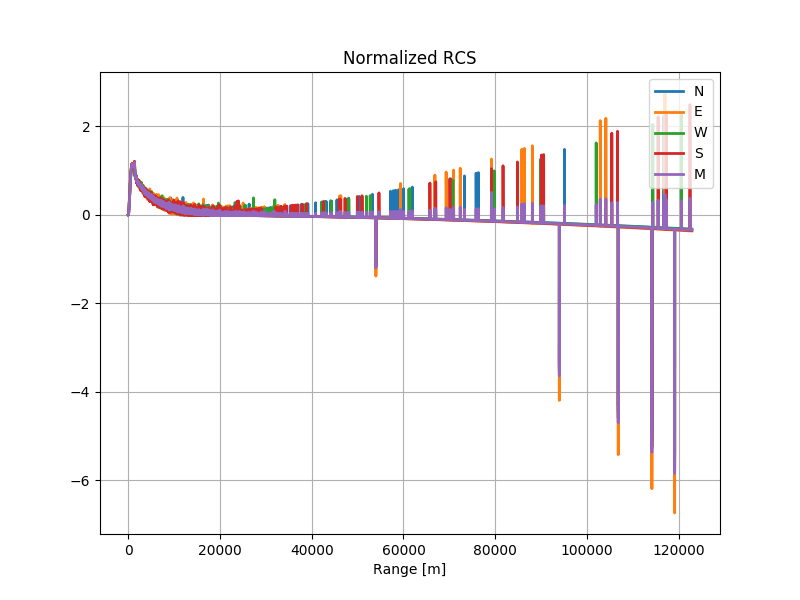

In [45]:
En = Erc / np.mean(Erc[r1:r2])
Sn = Src / np.mean(Src[r1:r2])
Wn = Wrc / np.mean(Wrc[r1:r2])
Nn = Nrc / np.mean(Nrc[r1:r2])
Mn = ( Nn + En + Sn + Wn ) / 4.0

plt.figure(figsize=(8,6))
plt.plot(z,Nn, linewidth=2, label = 'N')
plt.plot(z,En, linewidth=2, label = 'E')
plt.plot(z,Wn, linewidth=2, label = 'W')
plt.plot(z,Sn, linewidth=2, label = 'S')
plt.plot(z,Mn, linewidth=2, label = 'M')
plt.grid()
plt.legend(loc='upper right')
plt.title('Normalized RCS')
plt.xlabel('Range [m]')
plt.show()

/home/luka/anaconda3/envs/Python27/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.
/home/luka/anaconda3/envs/Python27/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  
/home/luka/anaconda3/envs/Python27/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/luka/anaconda3/envs/Python27/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


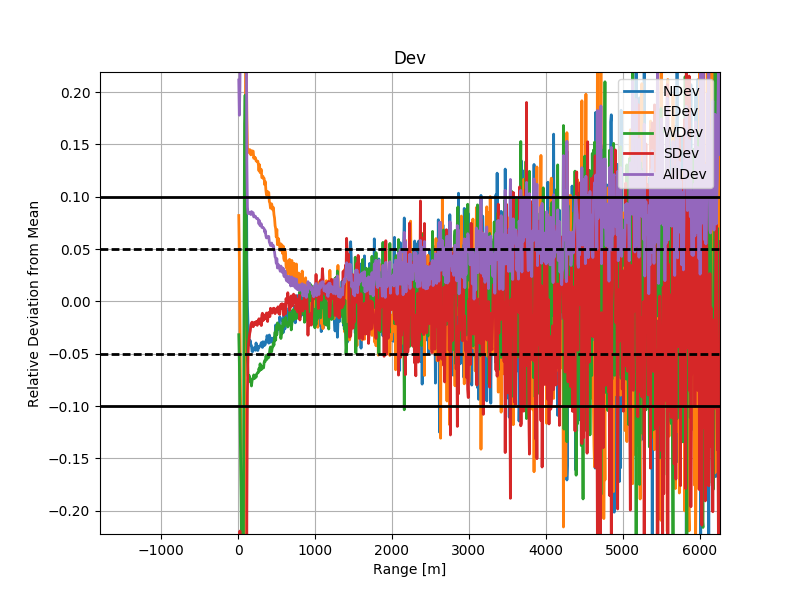

In [46]:
NDev = (Nn - Mn) / Mn
EDev = (En - Mn) / Mn
SDev = (Sn - Mn) / Mn
WDev = (Wn - Mn) / Mn
AllDev = np.sqrt((NDev**2 + EDev**2 + SDev**2 + WDev**2)/4.0)

plt.figure(figsize=(8,6))
plt.ylim(-0.5,0.5)
plt.plot(z,NDev, linewidth=2, label = 'NDev')
plt.plot(z,EDev, linewidth=2, label = 'EDev')
plt.plot(z,WDev, linewidth=2, label = 'WDev')
plt.plot(z,SDev, linewidth=2, label = 'SDev')
plt.plot(z,AllDev, linewidth=2, label = 'AllDev')
plt.axhline(y=0.1, linewidth=2, color='black')
plt.axhline(y=-0.1, linewidth=2, color='black')
plt.axhline(y=0.05, linestyle='--', linewidth=2, color='black')
plt.axhline(y=-0.05, linestyle='--', linewidth=2, color='black')
plt.grid()
plt.legend(loc='upper right')
plt.title('Dev')
plt.xlabel('Range [m]')
plt.ylabel('Relative Deviation from Mean')
plt.show()

In [36]:
lidar_site = 'station ID = bgd (Belgrade)\n'
lidar_name = 'system = BARLI\n'
channel = 'signal = 0387, analog\n'
date = 'date of measurement = 21.02.2019, 0040UTC\n'
columns = 'range, N, E, W, S, N2, D'
l = 4001
out_z = z[:l]
out_N = Nrc[:l]
out_E = Erc[:l]
out_W = Wrc[:l]
out_S = Src[:l]
out_N2 = N2rc[:l]
out_D = Drc[:l]
header = lidar_site + lidar_name + channel + date + columns
np.savetxt('tele387a.txt', np.column_stack((out_z,out_N,out_E,out_W,out_S,out_N2,out_D)), fmt='%.15e', header = header, comments='', delimiter=',')

In [42]:
lidar_site = 'station ID = bgd (Belgrade)\n'
lidar_name = 'system = BARLI\n'
channel = 'signal = 0355, photon counting\n'
date = 'date of measurement = 21.02.2019, 0040UTC\n'
columns = 'range, N, E, W, S, N2'
l = 4001
out_z = z[:l]
out_N = Nrc[:l]
out_E = Erc[:l]
out_W = Wrc[:l]
out_S = Src[:l]
out_N2 = N2rc[:l]
header = lidar_site + lidar_name + channel + date + columns
np.savetxt('tele355pc.txt', np.column_stack((out_z,out_N,out_E,out_W,out_S,out_N2)), fmt='%.15e', header = header, comments='', delimiter=',')